# Database connection

In [ ]:
from sqlalchemy import create_engine
import pandas as pd

# Replace credentials and database details accordingly
DATABASE_TYPE = 'mysql'
DBAPI = 'pymysql'
HOST = 'mysql-predict-jo2024.alwaysdata.net'
USER = '360558_read_only'
PASSWORD = 'Readonly12345'
DATABASE = 'predict-jo2024'

# Create database URL and engine
DATABASE_URL = f"{DATABASE_TYPE}+{DBAPI}://{USER}:{PASSWORD}@{HOST}/{DATABASE}"
engine = create_engine(DATABASE_URL)

# Data viz

In [47]:
table_names = ['olympic_athletes', 'olympic_hosts', 'olympic_medals', 'olympic_results']

# Create a dictionary of dataframes where keys are table names
dataframes = {}
for table in table_names:
    query = f"SELECT * FROM {table} LIMIT 100"
    dataframes[table] = pd.read_sql(query, con=engine)

# Display the data from the first table
dataframes['olympic_results'].head()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.,,
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.,,
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.,,
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.,,
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.,,


# Ploting viz

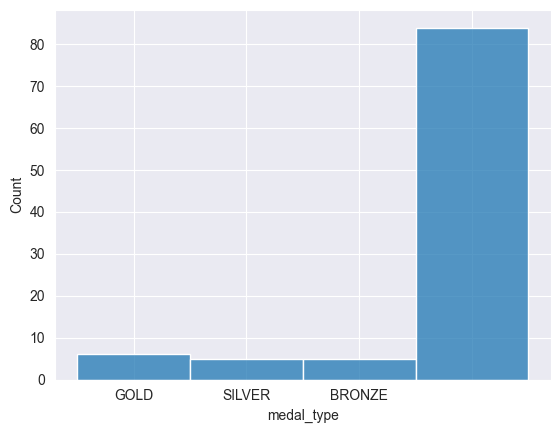

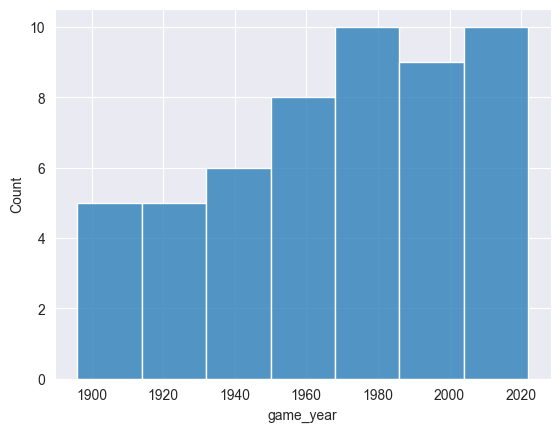

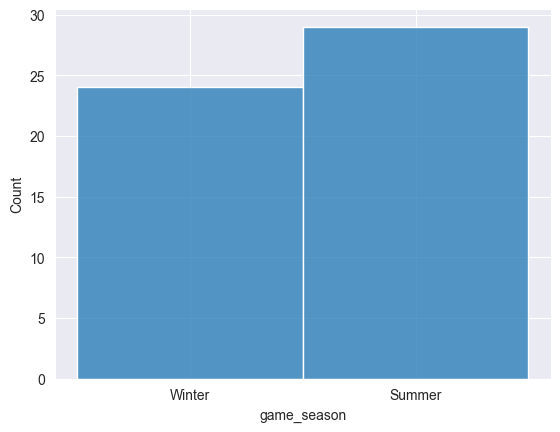

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'medal_type' in dataframes['olympic_results'].columns:
    sns.histplot(dataframes['olympic_results']['medal_type'])
    plt.show()

if 'game_year' in dataframes['olympic_hosts'].columns:
    sns.histplot(dataframes['olympic_hosts']['game_year'])
    plt.show()

if 'game_season' in dataframes['olympic_hosts'].columns:
    sns.histplot(dataframes['olympic_hosts']['game_season'])
    plt.show()

# Evènements marquants aux JO

In [49]:
# Combien de JO a organisé la France ?
table = 'olympic_hosts'

# Create a dictionary of dataframes where keys are table names
dataframes = {}
query = f"SELECT * FROM {table}"
dataframes[table] = pd.read_sql(query, con=engine)

# Display the data from the first table
dataframes['olympic_hosts'].head()

,index,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


In [50]:
# Combien de fois la France a-t-elle hébergé les JO ?
france_hosted = dataframes['olympic_hosts'][dataframes['olympic_hosts']['game_location'] == 'France']
nb_france_hosted = france_hosted.shape[0]

print(f"La France a hébergé les JO {nb_france_hosted} fois. +1, donc 6, avec 2024 qui n'est pas dans le dataset")

La France a hébergé les JO 5 fois. +1, donc 6, avec 2024 qui n'est pas dans le dataset


In [51]:
# Quels sont les pays qui ont le plus souvent hébergé les JO ?
hosted = dataframes['olympic_hosts']['game_location'].value_counts()
print(hosted)
print(f"La France est le 2e pays qui a le plus souvent hébergé les JO, juste apres les USA")

game_location
United States                  8
France                         5
Japan                          4
Great Britain                  3
Canada                         3
Italy                          3
Norway                         2
Germany                        2
Switzerland                    2
Austria                        2
China                          2
Greece                         2
Republic of Korea              2
Australia                      1
Spain                          1
Yugoslavia                     1
USSR                           1
Russian Federation             1
Federal Republic of Germany    1
Mexico                         1
Australia, Sweden              1
Finland                        1
Brazil                         1
Netherlands                    1
Belgium                        1
Sweden                         1
Name: count, dtype: int64
La France est le 2e pays qui a le plus souvent hébergé les JO, juste apres les USA


In [52]:
# Où a eu lieu le premier jeu d'hiver ?
winter_games = dataframes['olympic_hosts'][dataframes['olympic_hosts']['game_season'] == 'Winter']
first_winter_game = winter_games['game_year'].min()
first_winter_game_location = winter_games[winter_games['game_year'] == first_winter_game]['game_name'].values[0]

print(f"Le premier jeu d'hiver a eu lieu en {first_winter_game} à {first_winter_game_location}")

Le premier jeu d'hiver a eu lieu en 1924 à Chamonix 1924


In [53]:
# Il y avait-il des JO pour femmes en 1900 ?
table = 'olympic_results'

# On filtre sur les JO de 1900 car le CSV est trop gros
dataframe = {}
query = """
SELECT *
FROM {0}
WHERE slug_game LIKE '%%1900%%'
""".format(table)
dataframe[table] = pd.read_sql(query, con=engine)

dataframe['olympic_results'].head()

,Unnamed: 0,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,160618,Fencing,foil masters men,paris-1900,Athlete,GOLD,,,1,France,FR,FRA,https://olympics.com/en/athletes/lucien-merignac,Lucien MERIGNAC,,
1,160619,Fencing,foil masters men,paris-1900,Athlete,SILVER,,,2,France,FR,FRA,https://olympics.com/en/athletes/alphonse-kirc...,Alphonse KIRCHHOFFER,,
2,160620,Fencing,foil masters men,paris-1900,Athlete,BRONZE,,,3,France,FR,FRA,https://olympics.com/en/athletes/jean-baptiste...,Jean-Baptiste MIMIAGUE,,
3,160621,Fencing,foil masters men,paris-1900,Athlete,,,,4,Italy,IT,ITA,https://olympics.com/en/athletes/antonio-conte,Antonio CONTE,,
4,160622,Fencing,foil masters men,paris-1900,Athlete,,,,5,France,FR,FRA,https://olympics.com/en/athletes/jules-rossignol,Jules ROSSIGNOL,,


In [54]:
# Il y avait-il des JO pour femmes en 1900 ?
# Il faut que event_title contienne women
filtered_df = dataframe['olympic_results'][dataframe['olympic_results']['event_title'].str.contains('women')]
print(filtered_df)
print(f"Il y avait des JO pour femmes en 1900")

      Unnamed: 0 discipline_title       event_title   slug_game  \
412       161030             Golf  Individual women  paris-1900   
413       161031             Golf  Individual women  paris-1900   
414       161032             Golf  Individual women  paris-1900   
415       161033             Golf  Individual women  paris-1900   
416       161034             Golf  Individual women  paris-1900   
417       161035             Golf  Individual women  paris-1900   
418       161036             Golf  Individual women  paris-1900   
419       161037             Golf  Individual women  paris-1900   
420       161038             Golf  Individual women  paris-1900   
421       161039             Golf  Individual women  paris-1900   
1272      161890           Tennis     Singles women  paris-1900   
1273      161891           Tennis     Singles women  paris-1900   
1274      161892           Tennis     Singles women  paris-1900   
1275      161893           Tennis     Singles women  paris-190

In [55]:
# Load 'olympic_medals' table
query_results = "SELECT * FROM olympic_medals"
results_df = pd.read_sql(query_results, con=engine)

# Load 'olympic_hosts' table
query_hosts = "SELECT * FROM olympic_hosts"
hosts_df = pd.read_sql(query_hosts, con=engine)

In [56]:
merged_df = pd.merge(results_df, hosts_df, left_on='slug_game', right_on='game_slug', how='left')
print(merged_df)

       Unnamed: 0 discipline_title     slug_game  \
0               0          Curling  beijing-2022   
1               1          Curling  beijing-2022   
2               2          Curling  beijing-2022   
3               3          Curling  beijing-2022   
4               4          Curling  beijing-2022   
...           ...              ...           ...   
21692       21692    Weightlifting   athens-1896   
21693       21693    Weightlifting   athens-1896   
21694       21694    Weightlifting   athens-1896   
21695       21695    Weightlifting   athens-1896   
21696       21696    Weightlifting   athens-1896   

                           event_title event_gender medal_type  \
0                        Mixed Doubles        Mixed       GOLD   
1                        Mixed Doubles        Mixed       GOLD   
2                        Mixed Doubles        Mixed     SILVER   
3                        Mixed Doubles        Mixed     SILVER   
4                        Mixed Doubles       

In [57]:
# Filter to get only medalists
medalists_df = merged_df[merged_df['medal_type'].notnull()]

# Split into summer and winter medalists
summer_medalists = set(medalists_df[medalists_df['game_season'] == 'Summer']['athlete_full_name'])
winter_medalists = set(medalists_df[medalists_df['game_season'] == 'Winter']['athlete_full_name'])

# Find the intersection of both sets to get athletes who have medals in both types of games
dual_medalists = summer_medalists.intersection(winter_medalists)

# Display results
print("Athletes qui ont eu au moins une médaille aux JO d'été et d'hiver:")

# Trouver l'athlète qui a gagné une medaille ou plus dans les JO d'été ET d'hiver
medal_seasons = medalists_df.groupby(['athlete_full_name', 'game_year'])['game_season'].agg(set)

# Identify athletes who competed in both seasons within the same year
dual_medalists_same_year = medal_seasons[medal_seasons.apply(lambda x: 'Summer' in x and 'Winter' in x)]

# Print results
print("Athletes qui ont gagné une médaille ou plus dans les JO d'été et d'hiver la même année:")
print(dual_medalists_same_year)

Athletes qui ont eu au moins une médaille aux JO d'été et d'hiver:
Athletes qui ont gagné une médaille ou plus dans les JO d'été et d'hiver la même année:
athlete_full_name            game_year
                             1924         {Summer, Winter}
                             1928         {Summer, Winter}
                             1932         {Summer, Winter}
                             1936         {Summer, Winter}
                             1948         {Summer, Winter}
                             1952         {Summer, Winter}
                             1956         {Summer, Winter}
                             1960         {Summer, Winter}
                             1964         {Summer, Winter}
                             1968         {Summer, Winter}
                             1972         {Summer, Winter}
                             1976         {Summer, Winter}
                             1980         {Summer, Winter}
                             1984      

In [58]:
# In olympic_hosts : 
# index,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year

# Check if winter and summer games are in the same year or not
winter_games = hosts_df[hosts_df['game_season'] == 'Winter']
summer_games = hosts_df[hosts_df['game_season'] == 'Summer']

# Check if there are any years where both winter and summer games were held
common_years = set(winter_games['game_year']).intersection(set(summer_games['game_year']))

# Display results, sorted in ascending order
print("Les années où les JO d'hiver et d'été ont eu lieu la même année avant d'etre separee tous les 2 ans:")
print(sorted(common_years))


Les années où les JO d'hiver et d'été ont eu lieu la même année avant d'etre separee tous les 2 ans:
[1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992]


In [59]:
# In olympic_medals, check if Johnny WEISSMULLER won medals
weissmuller_medals = results_df[results_df['athlete_full_name'] == 'Johnny WEISSMULLER']

# Get the total number of medals won by Johnny WEISSMULLER
print('Johnny a gagne ',weissmuller_medals.shape[0],' medailles')

Johnny a gagne  3  medailles


In [60]:
# Athletes
# athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
table = 'olympic_athletes'
athletes = {}
query = f"SELECT * FROM {table}"
athletes[table] = pd.read_sql(query, con=engine)

# Medals
# Unnamed: 0,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
table = 'olympic_medals'
medals = {}
query = f"SELECT * FROM {table}"
medals[table] = pd.read_sql(query, con=engine)

# convert to df
athletes_df = pd.DataFrame(athletes['olympic_athletes'])
medals_df = pd.DataFrame(medals['olympic_medals'])

# Filter to 2012
medals_2012 = medals_df[medals_df['slug_game'].str.contains('london-2012')]

# Filter for female participants (assuming 'Women' in event_title indicates female events)
female_medals_2012 = medals_2012[medals_2012['event_title'].str.contains('women')]

# Group by country and count the number of medals
countries_with_females = female_medals_2012.groupby('country_name').size()

# Check if every country has at least sent one woman
all_countries_2012 = medals_2012['country_name'].unique()
countries_without_females = set(all_countries_2012) - set(countries_with_females)

# Display results
print("Pays sans femmes aux JO de Londres 2012:")
print(countries_without_females)

Pays sans femmes aux JO de Londres 2012:
{'Slovakia', 'Kazakhstan', 'Ireland', 'Germany', 'Morocco', 'United States of America', 'Egypt', 'Norway', 'Islamic Republic of Iran', 'Gabon', 'Turkey', 'Georgia', 'Cyprus', 'Sweden', 'Switzerland', 'Botswana', 'Qatar', 'Cameroon', "People's Republic of China", 'Czech Republic', 'Indonesia', 'Finland', "Democratic People's Republic of Korea", 'Cuba', 'Kenya', 'Armenia', 'Japan', 'Russian Federation', 'Saudi Arabia', 'Greece', 'Portugal', 'Great Britain', 'Bulgaria', 'Romania', 'Azerbaijan', 'Lithuania', 'Argentina', 'Mexico', 'Italy', 'Uganda', 'Tunisia', 'Latvia', 'Montenegro', 'Serbia', 'Ukraine', 'Grenada', 'Hungary', 'Slovenia', 'Estonia', 'Brazil', 'Tajikistan', 'Thailand', 'Spain', 'Denmark', 'Canada', 'Dominican Republic', 'Ethiopia', 'Hong Kong, China', 'Trinidad and Tobago', 'Bahrain', 'Singapore', 'Algeria', 'Kuwait', 'Colombia', 'Australia', 'Bahamas', 'Malaysia', 'Jamaica', 'South Africa', 'Belgium', 'Guatemala', 'Republic of Korea'

In [61]:
# Verifier si clay pigeon a eu lieu apres les JO de 1900, contenu dans olympic_medals sous event_title
# Filter to get only clay pigeon events
clay_pigeon_events = medals_df[medals_df['event_title'].str.contains('clay pigeon')]

# Check if there are any clay pigeon events after 1900
clay_pigeon_after_1900 = clay_pigeon_events[clay_pigeon_events['slug_game'].str.contains('1900') == False]

# Display results
print("Clay pigeon events après les JO de 1900:")
print(clay_pigeon_after_1900)
print('Le sport de tir au pigeon d\'argile a eu lieu après les JO de 1900')

Clay pigeon events après les JO de 1900:
       Unnamed: 0 discipline_title     slug_game  \
19440       19440         Shooting    paris-1924   
19441       19441         Shooting    paris-1924   
19442       19442         Shooting    paris-1924   
20148       20148         Shooting  antwerp-1920   
20149       20149         Shooting  antwerp-1920   
20150       20150         Shooting  antwerp-1920   
20172       20172         Shooting  antwerp-1920   
20173       20173         Shooting  antwerp-1920   
20174       20174         Shooting  antwerp-1920   

                        event_title event_gender medal_type participant_type  \
19440         clay pigeons team men          Men       GOLD         GameTeam   
19441         clay pigeons team men          Men     SILVER         GameTeam   
19442         clay pigeons team men          Men     BRONZE         GameTeam   
20148  clay pigeons, individual men          Men       GOLD          Athlete   
20149  clay pigeons, individual men   

# Questions ouvertes

In [62]:
# Combien de medailles a gagne la France depuis le debut des JO ?
medals_france = medals_df[medals_df['country_name'] == 'France']

# On compte le nombre de medailles
nb_medals_france = medals_france.shape[0]
print(f"La France a gagne {nb_medals_france} medailles depuis le debut des JO")

La France a gagne 952 medailles depuis le debut des JO


In [63]:
# Lors de quelles JO la France a-t-elle gagne le plus de medailles ?
medals_france_grouped = medals_france.groupby('slug_game').size()

# On recupere l'annee des JO ou la France a gagne le plus de medailles
most_medals_year = medals_france_grouped.idxmax()
most_medals = medals_france_grouped.max()

print(f"La France a gagne le plus de medailles aux JO de {most_medals_year} avec {most_medals} medailles")

La France a gagne le plus de medailles aux JO de paris-1900 avec 103 medailles


In [64]:
# Lors de quelles JO la France a-t-elle gagne le moins de medailles ?
least_medals_year = medals_france_grouped.idxmin()
least_medals = medals_france_grouped.min()

print(f"La France a gagne le moins de medailles aux JO de {least_medals_year} avec {least_medals} medailles")

La France a gagne le moins de medailles aux JO de garmisch-partenkirchen-1936 avec 1 medailles


In [65]:
# Peut-on considérer que la France est la grande spécialiste de certaine(s) discipline(s) sportive(s), comparativement aux autres notions ? Laquelle / Lesquelles ?
# On va regarder les medailles gagnees par la France par discipline
medals_france_discipline = medals_france.groupby('discipline_title').size()

# On recupere la discipline ou la France a gagne le plus de medailles
most_medals_discipline = medals_france_discipline.idxmax()
most_medals_discipline_count = medals_france_discipline.max()

print(f"La France est la grande specialiste de {most_medals_discipline} avec {most_medals_discipline_count} medailles")


La France est la grande specialiste de Fencing avec 123 medailles


In [66]:
# Quelles sont les sports les plus dominants dans les JO au fil des ans ?
medals_discipline = medals_df.groupby('discipline_title').size()

# On recupere la discipline la plus dominante
most_medals_discipline = medals_discipline.idxmax()
most_medals_discipline_count = medals_discipline.max()

print(f"Le sport le plus dominant dans les JO est {most_medals_discipline} avec {most_medals_discipline_count} medailles")

Le sport le plus dominant dans les JO est Athletics avec 3080 medailles
